In [294]:
import numpy as np
import matplotlib.pyplot as plt

In [295]:
with open ("output.log") as f:
    data_lines = f.readlines()[1::2]
clean_data = [word.rstrip().lstrip().split(":")  for data_line in data_lines for word in data_line.split('\t') if word != '']
clean_data

[['iter', ' 121'],
 ['time per iter', ' 0.0920'],
 ['Epoch time', ' 11.13'],
 ['average_loss',
  ' [3.5725397546336337, 3.5653701102839106, 3.3497356125648987, 3.499995307488875, 3.3144253233829177, 3.4129675641844543, 3.3651953774529533, 3.4798189844052816, 3.741521527968257, 3.5950143458186714, 3.539626214098423, 3.581475555255849, 3.4371102824807167, 3.4929674792645584, 3.572942340096762, 3.5465070389686746, 3.1995220269475664, 3.442756262692538, 3.4622658640146255, 3.439390776292333]'],
 ['average_reward',
  ' [4.274019398548794, 3.730424337749519, 2.7600273732602068, 4.227157762073579, 5.300453176236002, 2.149932583141906, 5.625972335165609, 2.1597181273812813, 4.729540512509082, 3.696173282701989, 3.823028553959208, 4.051279705705124, 3.5062603722914596, 4.21244125888472, 7.9564793953658945, 3.6636413887473935, 6.1367405244658295, 4.385501285549119, 5.254428230407767, 3.39950011587283]'],
 ['iter', ' 93'],
 ['time per iter', ' 0.0904'],
 ['Epoch time', ' 8.41'],
 ['average_loss',

In [296]:

loss_data_dict = {key:[] for key in dict(clean_data).keys()}
loss_data_dict

{'iter': [],
 'time per iter': [],
 'Epoch time': [],
 'average_loss': [],
 'average_reward': []}

In [297]:
for i in range(0,len(clean_data),len(loss_data_dict)):
    for j in range(len(loss_data_dict)):
        k = clean_data[i+j][0]
        v = clean_data[i+j][1]
        v = v.replace('nan', 'np.nan')

        eval_v = eval(v)
            
        loss_data_dict[k].append(eval_v)

robot_count = len(loss_data_dict['average_loss'][0])
epochs_range = len(loss_data_dict['iter'])
loss_data_dict['average_loss'] = np.array(loss_data_dict['average_loss'])
loss_data_dict['average_reward'] = np.array(loss_data_dict['average_reward'])

In [298]:
loss_data_dict['average_loss'].shape

(80, 20)

In [ ]:
rows = 5
cols = 4

IndexError: index 10 is out of bounds for axis 0 with size 10

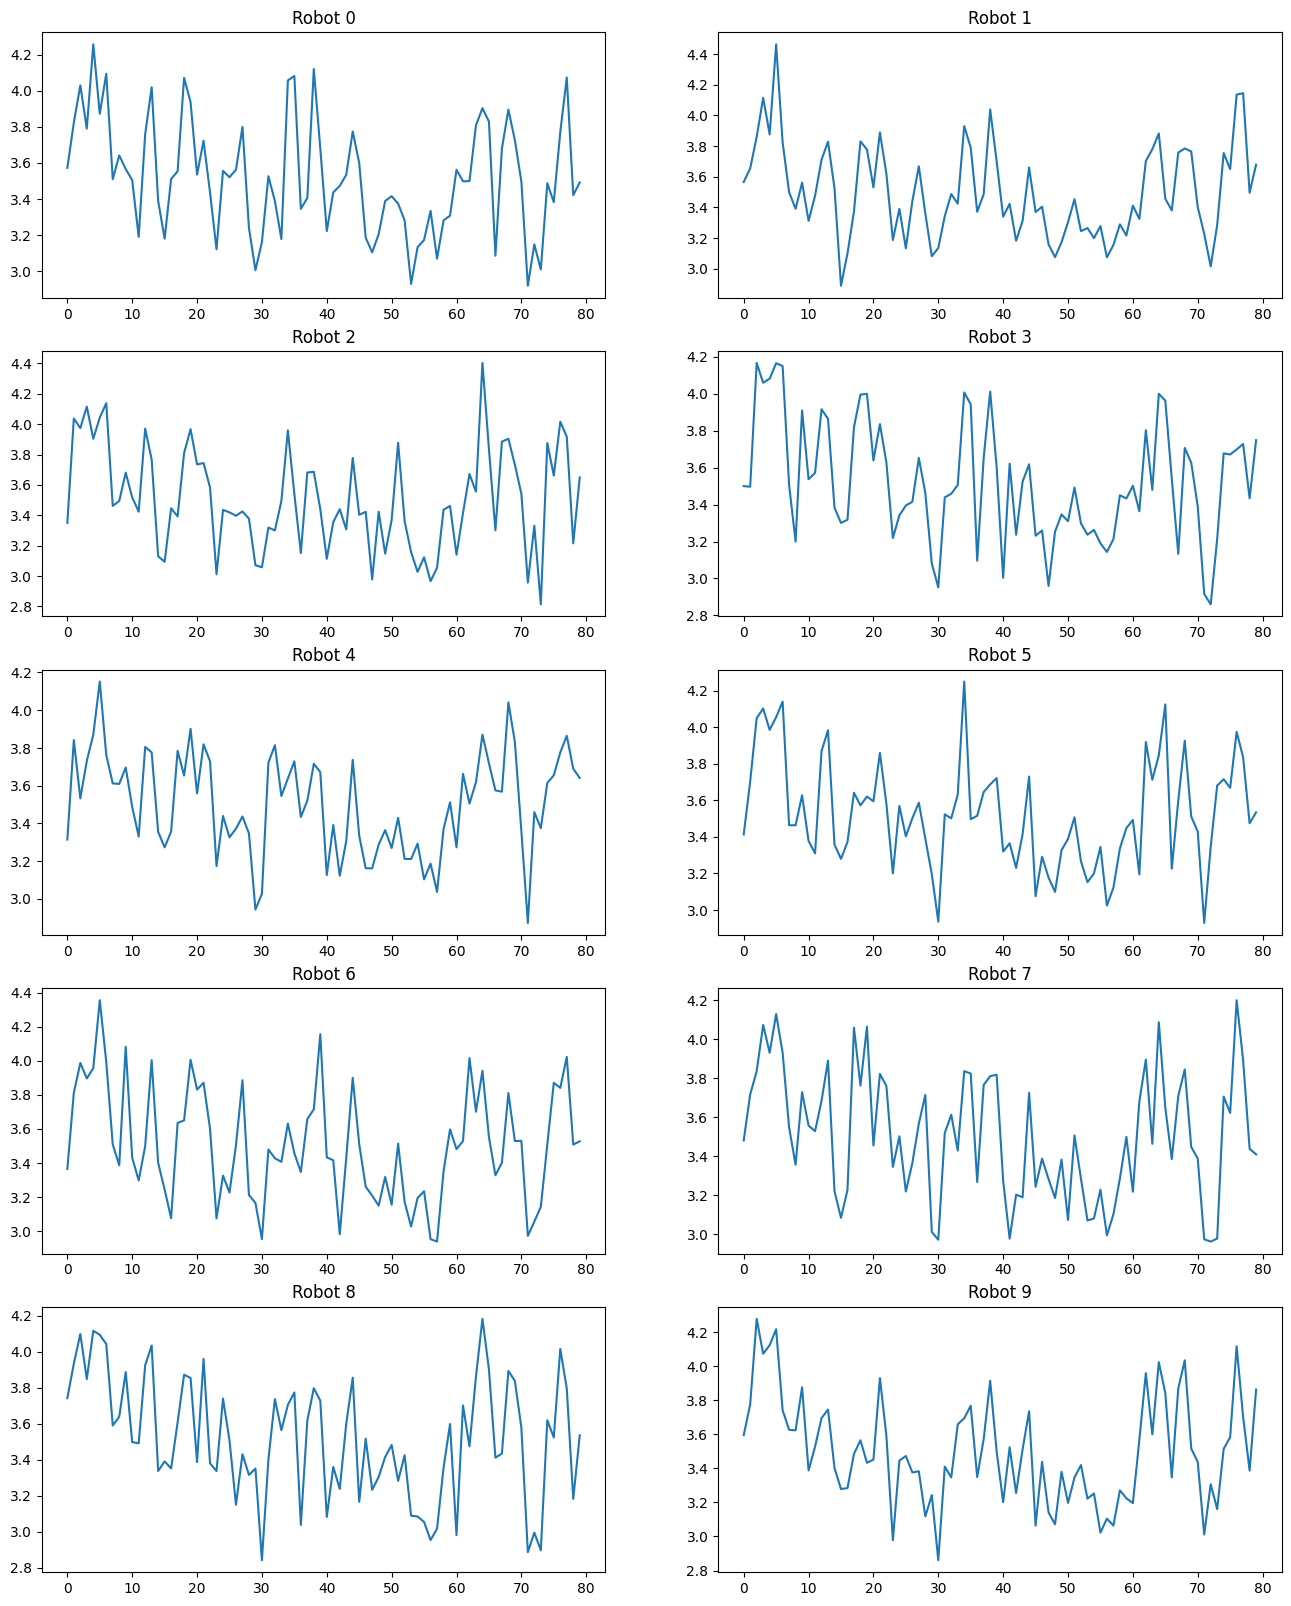

In [300]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(16,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_loss'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Loss vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()


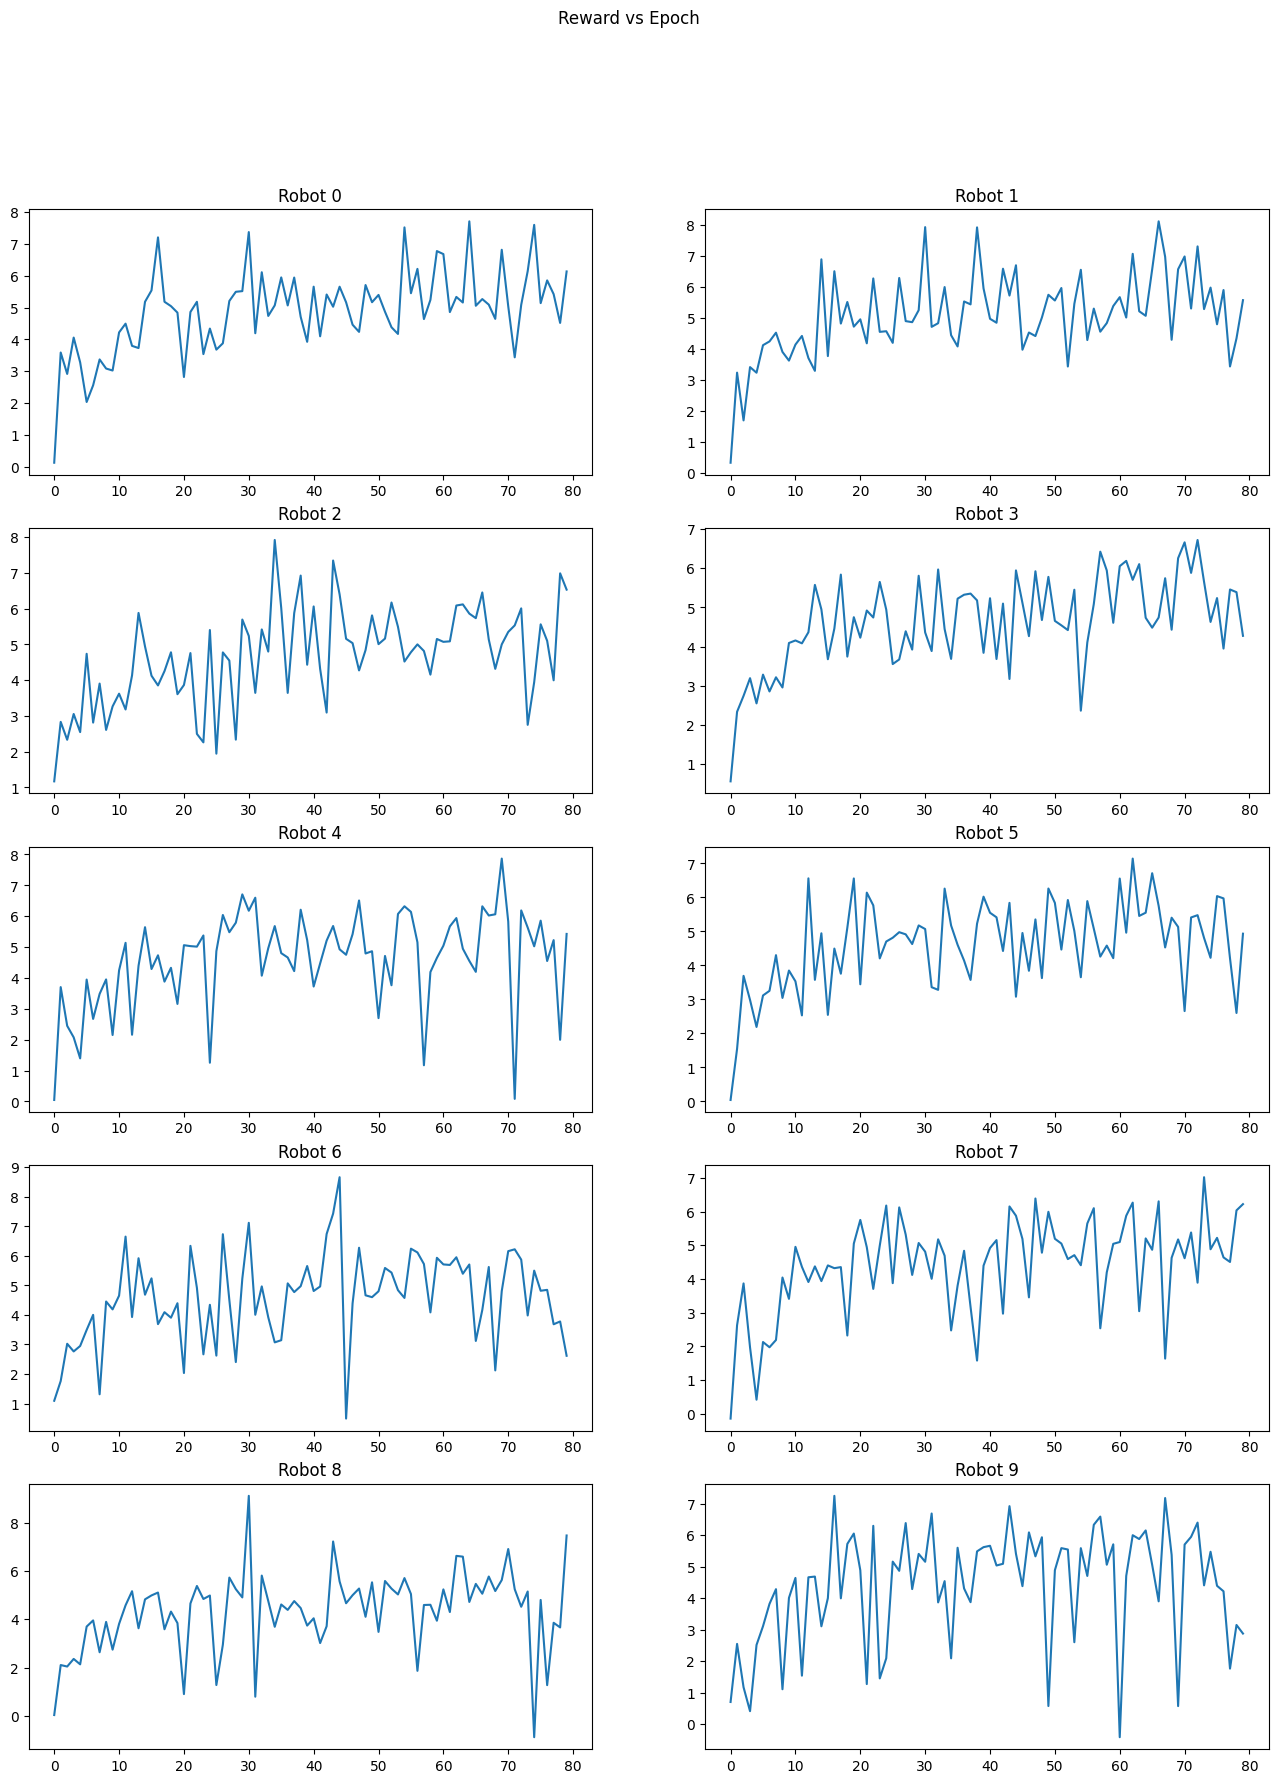

In [ ]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(16,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_reward'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Reward vs Epoch')
plt.savefig("4_robot_reward.png")
plt.show()

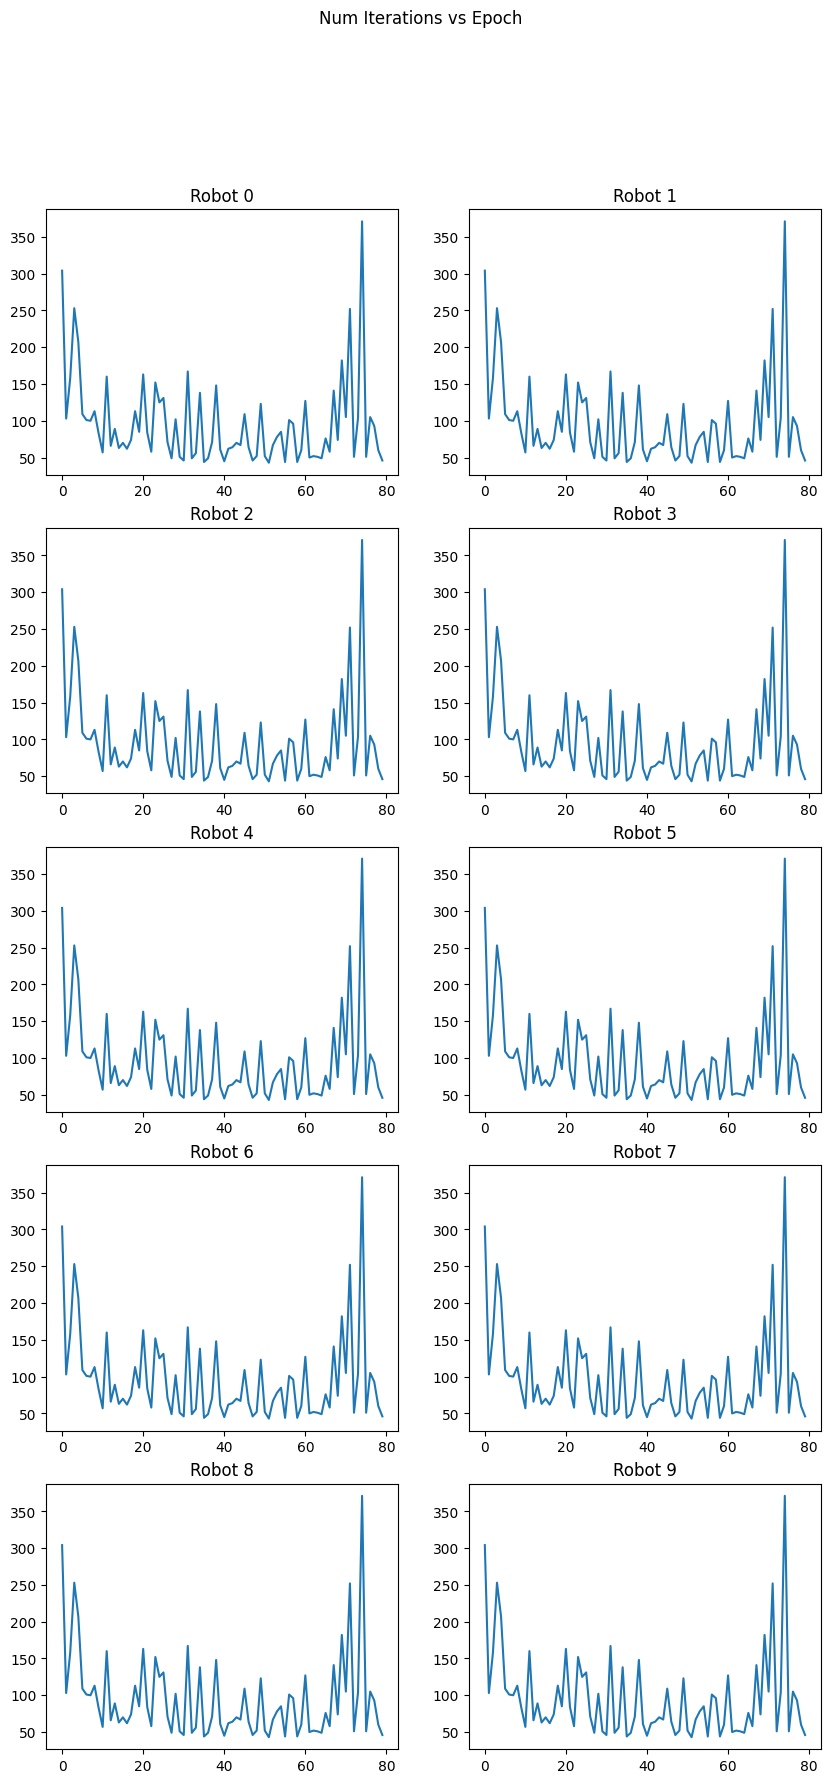

In [ ]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['iter'][:])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Num Iterations vs Epoch')
plt.savefig("4_robot_iter.png")
plt.show()

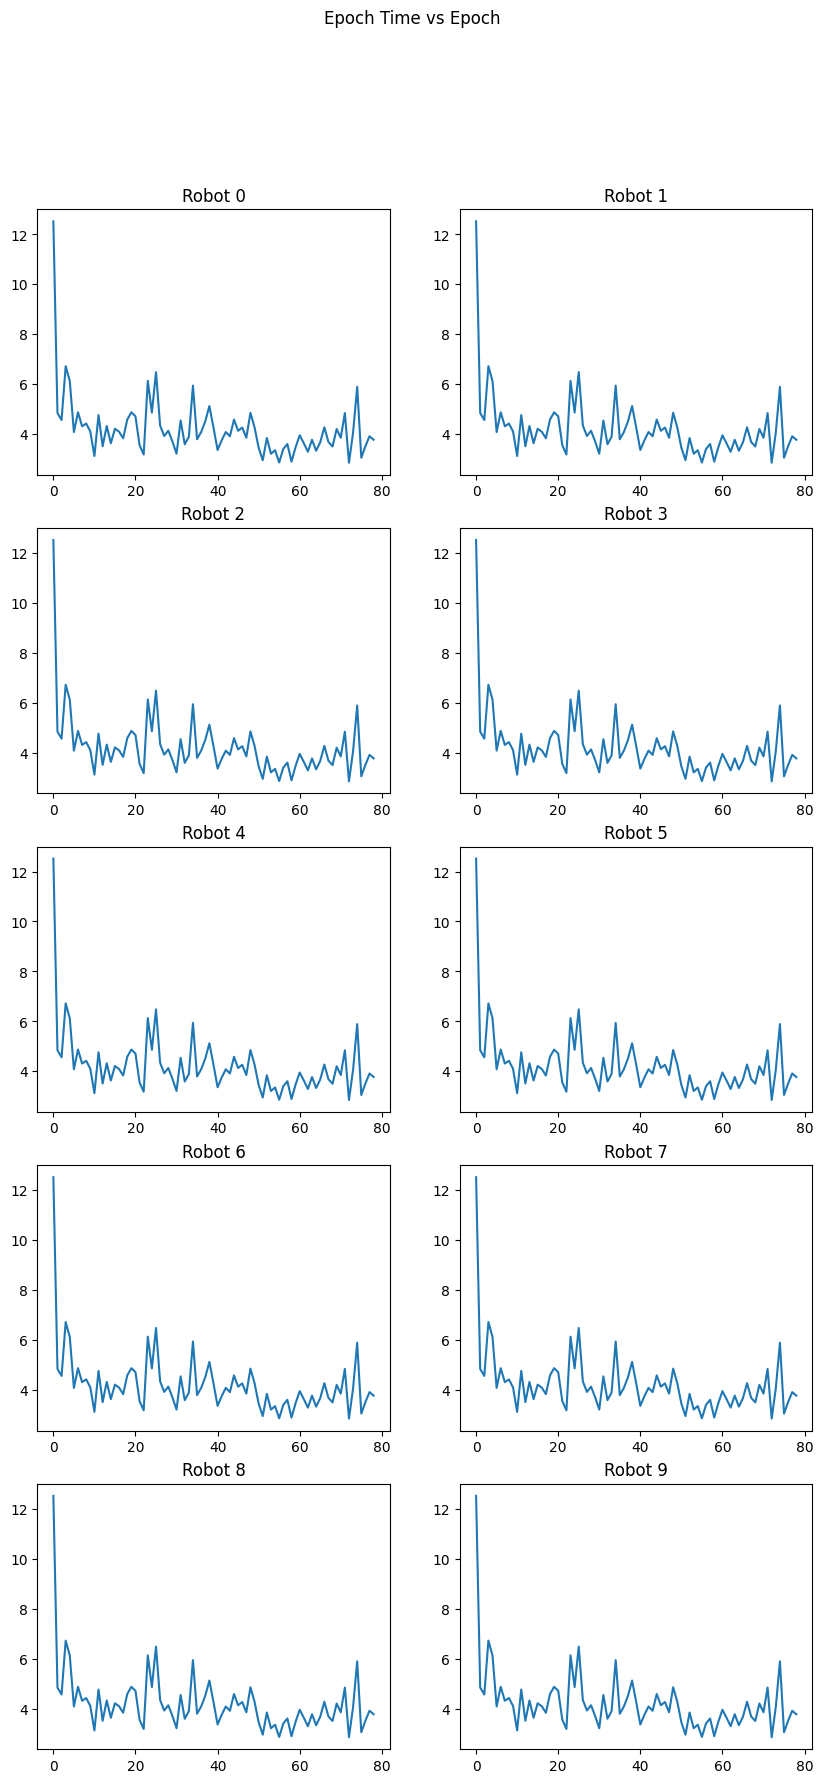

In [ ]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:-1],loss_data_dict['Epoch time'][:-1])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Epoch Time vs Epoch')
plt.savefig("4_robot_time.png")
plt.show()